# Project 1

## 1: Demo specific functions

In [2]:
# Import from separate .py files
from ga import *
from p1 import *

In [1]:
# Set parameters

params = {
        'indiv_len': 8,
        'pop_size': 8,     # Has to be even
        'num_parents':8,   # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['01110111', '00110011', '00100110', '11110011', '10001010', '00100010', '10000100', '00011010']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['10001010', '00011010', '01110111', '10001010', '11110011', '01110111', '10001010', '11110011']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['11000', '00111', '10000', '01111', '11100', '00011', '10000', '01111']

Mutation:
 ['11111', '00000', '11110', '00000', '10111', '10000', '11111', '00000']


A new generation:
 ['10000', '00111', '10000', '01111', '10000', '00111', '10000', '01111']


## 2: Demo GA - Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }
algorithm_2 = GA(params, fitness=sine_fitness)
eval_log = algorithm_2.run()

Algorithm succsessfully executed


In [13]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')
        

Generation: 0 

Population: ['0101111101', '1000101010', '1011011111', '1101011010', '0111100110', '0000000110', '1101101011', '1010011000'] 

Population real value: [ 47.625  69.25   91.875 107.25   60.75    0.75  109.375  83.   ] 

Population sine fitness value: ['-0.48', '0.13', '-0.70', '0.42', '-0.87', '0.68', '0.55', '0.97'] 


Generation: 10 

Population: ['1010111111', '1011110111', '1010010110', '1000011101', '1000010001', '1010010111', '1011010110', '1110011101'] 

Population real value: [ 87.875  94.875  82.75   67.625  66.125  82.875  90.75  115.625] 

Population sine fitness value: ['-0.09', '0.59', '0.88', '-1.00', '-0.15', '0.93', '0.35', '0.58'] 




<IPython.core.display.Javascript object>


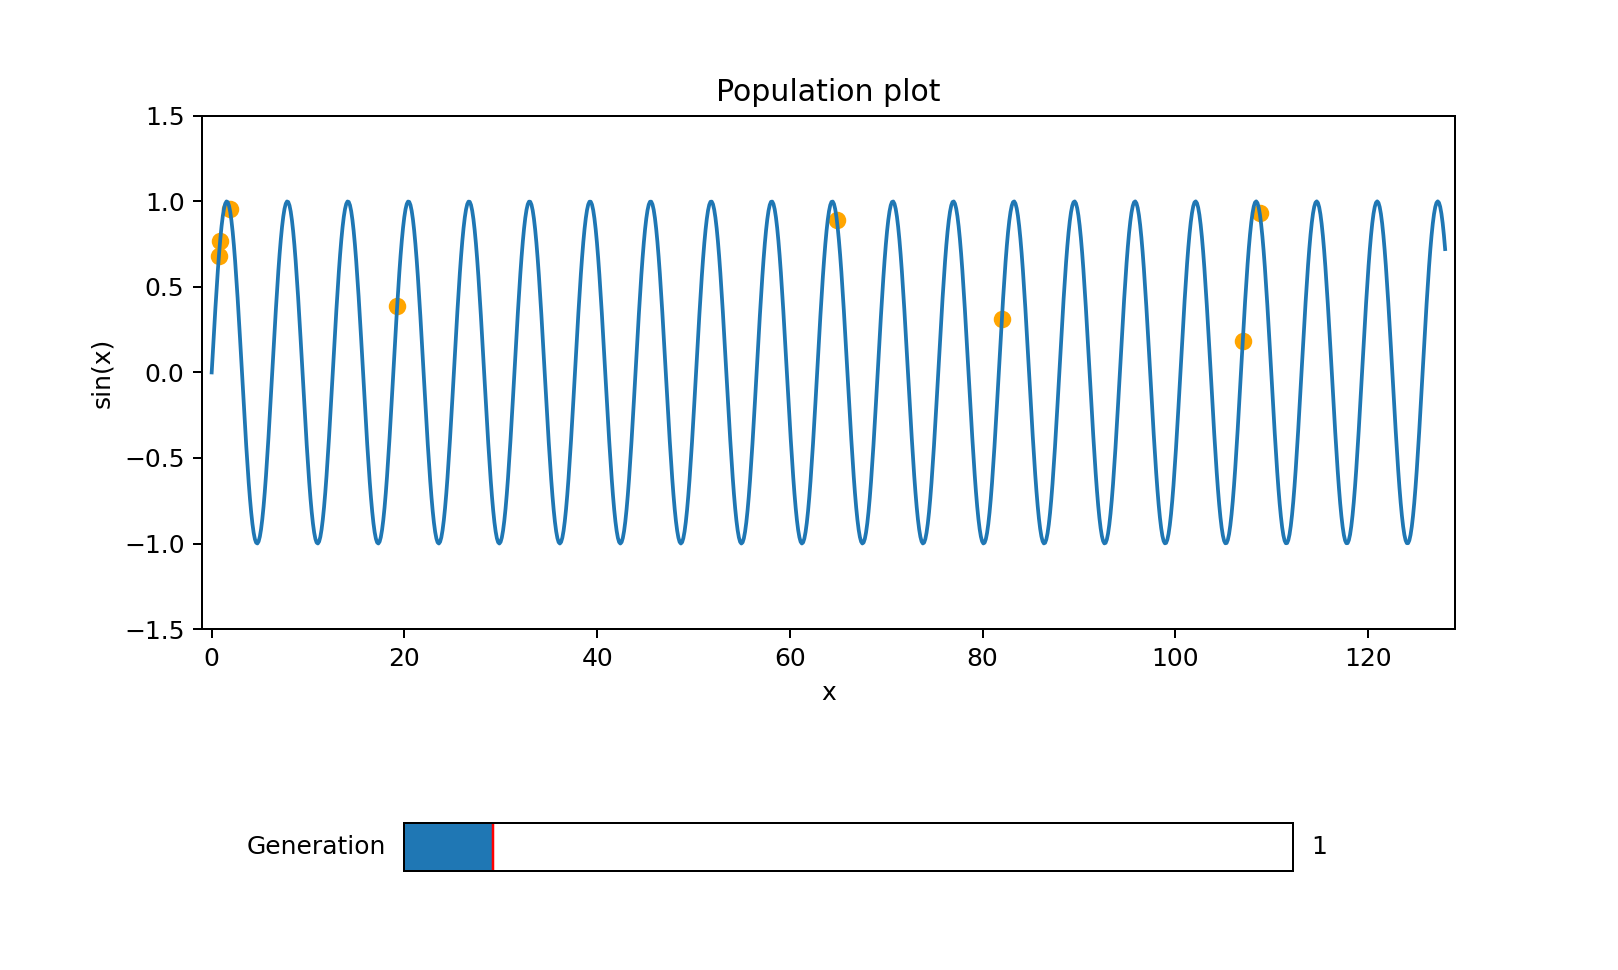

0

In [14]:
# Plot the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = eval_log[i][0]
y = eval_log[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[eval_log[gen][0], eval_log[gen][1]])

generation.on_changed(update)



## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [ ]:

params = {
        'indiv_len': 10,
        'pop_size': 8,     # Has to be even
        'num_parents':8,   # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,
        'max_gen': 10, 
        'sine_constraint': True
    }

algorithm_3 = GA(params, fitness=sine_fitness)
eval_log = algoritm_3.run()
